In [132]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [133]:
import numpy as np
import pandas as pd

In [134]:
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [135]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, inspect

In [136]:
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [137]:
connection = engine.connect()

In [138]:
# reflect an existing database into a new model
Base = automap_base()
Base.prepare(engine, reflect=True)
Base.classes.keys()
# reflect the tables

['measurement', 'station']

In [139]:

measurements_db = pd.read_sql("SELECT * FROM measurement", connection)

In [140]:
station_db= pd.read_sql("SELECT * FROM station", connection)

In [141]:
# We can view all of the classes that automap found
measurement = Base.classes.measurement
station=Base.classes.station

In [11]:
# Save references to each table


In [142]:
# Create our session (link) from Python to the DB
session = Session(engine)
inspector = inspect(engine)

In [143]:

measu_columns =inspector.get_columns("measurement")
for column in measu_columns:
    print(column)

{'name': 'id', 'type': INTEGER(), 'nullable': False, 'default': None, 'autoincrement': 'auto', 'primary_key': 1}
{'name': 'station', 'type': TEXT(), 'nullable': True, 'default': None, 'autoincrement': 'auto', 'primary_key': 0}
{'name': 'date', 'type': TEXT(), 'nullable': True, 'default': None, 'autoincrement': 'auto', 'primary_key': 0}
{'name': 'prcp', 'type': FLOAT(), 'nullable': True, 'default': None, 'autoincrement': 'auto', 'primary_key': 0}
{'name': 'tobs', 'type': FLOAT(), 'nullable': True, 'default': None, 'autoincrement': 'auto', 'primary_key': 0}


In [144]:
measu_columns =inspector.get_columns("station")
for column in measu_columns:
    print(column)

{'name': 'id', 'type': INTEGER(), 'nullable': False, 'default': None, 'autoincrement': 'auto', 'primary_key': 1}
{'name': 'station', 'type': TEXT(), 'nullable': True, 'default': None, 'autoincrement': 'auto', 'primary_key': 0}
{'name': 'name', 'type': TEXT(), 'nullable': True, 'default': None, 'autoincrement': 'auto', 'primary_key': 0}
{'name': 'latitude', 'type': FLOAT(), 'nullable': True, 'default': None, 'autoincrement': 'auto', 'primary_key': 0}
{'name': 'longitude', 'type': FLOAT(), 'nullable': True, 'default': None, 'autoincrement': 'auto', 'primary_key': 0}
{'name': 'elevation', 'type': FLOAT(), 'nullable': True, 'default': None, 'autoincrement': 'auto', 'primary_key': 0}


In [145]:
station_db

,id,station,name,latitude,longitude,elevation
0,1,USC00519397,"WAIKIKI 717.2, HI US",21.27160,-157.81680,3.0
1,2,USC00513117,"KANEOHE 838.1, HI US",21.42340,-157.80150,14.6
2,3,USC00514830,"KUALOA RANCH HEADQUARTERS 886.9, HI US",21.52130,-157.83740,7.0
3,4,USC00517948,"PEARL CITY, HI US",21.39340,-157.97510,11.9
4,5,USC00518838,"UPPER WAHIAWA 874.3, HI US",21.49920,-158.01110,306.6
5,6,USC00519523,"WAIMANALO EXPERIMENTAL FARM, HI US",21.33556,-157.71139,19.5
6,7,USC00519281,"WAIHEE 837.5, HI US",21.45167,-157.84889,32.9
7,8,USC00511918,"HONOLULU OBSERVATORY 702.2, HI US",21.31520,-157.99920,0.9
8,9,USC00516128,"MANOA LYON ARBO 785.2, HI US",21.33310,-157.80250,152.4


In [146]:
measurements_db

,id,station,date,prcp,tobs
0,1,USC00519397,2010-01-01,0.08,65.0
1,2,USC00519397,2010-01-02,0.00,63.0
2,3,USC00519397,2010-01-03,0.00,74.0
3,4,USC00519397,2010-01-04,0.00,76.0
4,5,USC00519397,2010-01-06,NaN,73.0
...,...,...,...,...,...
19545,19546,USC00516128,2017-08-19,0.09,71.0
19546,19547,USC00516128,2017-08-20,NaN,78.0
19547,19548,USC00516128,2017-08-21,0.56,76.0
19548,19549,USC00516128,2017-08-22,0.50,76.0


# Exploratory Climate Analysis

In [147]:
# Find the latest date
session.query(measurement.date).order_by(measurement.date.desc()).first()



('2017-08-23')

In [148]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results
year=session.query(measurement.date, measurement.prcp).filter(measurement.date <"2017-08-23").filter(measurement.date >"2016-08-23").all()
# Calculate the date 1 year ago from the last data point in the database

# Perform a query to retrieve the data and precipitation scores
year_db=pd.DataFrame(year)
# Save the query results as a Pandas DataFrame and set the index to the date column

# Sort the dataframe by date


year_db_byDate=year_db.sort_values("date", ascending=False)
year_db_byDate
grouped_db=year_db.groupby(["date"])
grouped_db.head()
year_db

,date,prcp
0,2016-08-24,0.08
1,2016-08-25,0.08
2,2016-08-26,0.00
3,2016-08-27,0.00
4,2016-08-28,0.01
...,...,...
2214,2017-08-18,NaN
2215,2017-08-19,0.09
2216,2017-08-20,NaN
2217,2017-08-21,0.56


<BarContainer object of 2219 artists>

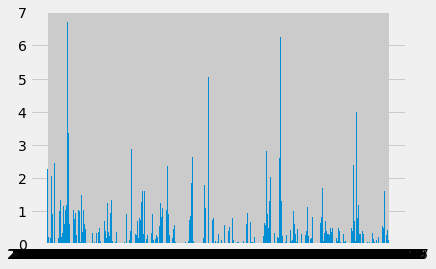

In [149]:
# Use Pandas Plotting with Matplotlib to plot the data
perc2=year_db_byDate["prcp"]
#leng=len(grouped_db)
x2=year_db_byDate["date"]
plt.bar(x, perc)

In [ ]:
#ax= climate_df.plot.bar(figsize=(16,12), width=20)
#ax.set_xlabel("date", fontsize=16)
#ax.set_xticklabels([])
#plt.legend(['precipitation'], fontsize=28)
#ax.get_legend().set_bbox_to_anchor((0.6, 1))

#plt.show()


In [150]:
# Use Pandas to calcualte the summary statistics for the precipitation data
stats=year_db_byDate.describe()


In [151]:
# Design a query to show how many stations are available in this dataset?
session.query(station.id).count()

9

In [152]:
# What are the most active stations? (i.e. what stations have the most rows)?
active_Count=measurements_db.groupby(measurements_db["station"]).count()
# List the stations and the counts in descending order.
active_Count.head(10)

,id,date,prcp,tobs
station,,,,
USC00511918,1979,1979,1932,1979
USC00513117,2709,2709,2696,2709
USC00514830,2202,2202,1937,2202
USC00516128,2612,2612,2484,2612
USC00517948,1372,1372,683,1372
USC00518838,511,511,342,511
USC00519281,2772,2772,2772,2772
USC00519397,2724,2724,2685,2724
USC00519523,2669,2669,2572,2669


In [153]:
#create df of just busiest station
Busy_Stat= measurements_db.loc[measurements_db["station"] == "USC00519281"]
Busy_Stat

,id,station,date,prcp,tobs
12187,12188,USC00519281,2010-01-01,0.15,70.0
12188,12189,USC00519281,2010-01-02,0.00,62.0
12189,12190,USC00519281,2010-01-03,0.00,74.0
12190,12191,USC00519281,2010-01-04,0.00,75.0
12191,12192,USC00519281,2010-01-05,0.00,74.0
...,...,...,...,...,...
14954,14955,USC00519281,2017-08-14,0.00,77.0
14955,14956,USC00519281,2017-08-15,0.32,77.0
14956,14957,USC00519281,2017-08-16,0.12,76.0
14957,14958,USC00519281,2017-08-17,0.01,76.0


In [129]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature of the most active station?
low_per= Busy_Stat["prcp"].min()
high_per= Busy_Stat["prcp"].max()
avg_per= Busy_Stat["prcp"].mean()

print(low_per)
print(high_per)
print(avg_per)

0.0
9.64
0.2123520923520915


(array([ 5.,  7.,  7., 12., 27., 41., 40., 57., 66., 52., 29.,  8.]),
 array([59., 61., 63., 65., 67., 69., 71., 73., 75., 77., 79., 81., 83.]),
 <a list of 12 Patch objects>)

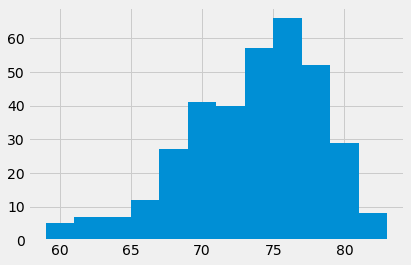

In [154]:
# Choose the station with the highest number of temperature observations.
Busy_temp_1yr =session.query( measurement.tobs).filter(measurement.date <"2017-08-23").filter(measurement.date >"2016-08-23").filter(measurement.station == "USC00519281").all()
Busy_temp_1yr
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
Busy_temp_1yr_df= pd.DataFrame(Busy_temp_1yr)

plt.hist(Busy_temp_1yr_df["tobs"], bins=12)

## Bonus Challenge Assignment

In [156]:
# This function called `calc_temps` will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates
def calc_temps(start_date, end_date):
    """TMIN, TAVG, and TMAX for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        TMIN, TAVE, and TMAX
    """
    
    return session.query(func.min(measurement.tobs), func.avg(measurement.tobs), func.max(measurement.tobs)).\
        filter(measurement.date >= start_date).filter(measurement.date <= end_date).all()

# function usage example
print(calc_temps('2012-02-28', '2012-03-05'))

[(62.0, 69.57142857142857, 74.0)]


In [ ]:
# Use your previous function `calc_temps` to calculate the tmin, tavg, and tmax 
# for your trip using the previous year's data for those same dates.


In [ ]:
# Plot the results from your previous query as a bar chart. 
# Use "Trip Avg Temp" as your Title
# Use the average temperature for the y value
# Use the peak-to-peak (tmax-tmin) value as the y error bar (yerr)


In [ ]:
# Calculate the total amount of rainfall per weather station for your trip dates using the previous year's matching dates.
# Sort this in descending order by precipitation amount and list the station, name, latitude, longitude, and elevation



In [ ]:
# Create a query that will calculate the daily normals 
# (i.e. the averages for tmin, tmax, and tavg for all historic data matching a specific month and day)

def daily_normals(date):
    """Daily Normals.
    
    Args:
        date (str): A date string in the format '%m-%d'
        
    Returns:
        A list of tuples containing the daily normals, tmin, tavg, and tmax
    
    """
    
    sel = [func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)]
    return session.query(*sel).filter(func.strftime("%m-%d", Measurement.date) == date).all()
    
daily_normals("01-01")

In [ ]:
# calculate the daily normals for your trip
# push each tuple of calculations into a list called `normals`

# Set the start and end date of the trip

# Use the start and end date to create a range of dates

# Stip off the year and save a list of %m-%d strings

# Loop through the list of %m-%d strings and calculate the normals for each date


In [ ]:
# Load the previous query results into a Pandas DataFrame and add the `trip_dates` range as the `date` index


In [ ]:
# Plot the daily normals as an area plot with `stacked=False`
